- Nama     : Sapto Aji Pamungkas
- Kelas    : Job Connector Data Science and Machine Learning Batch 7
- Ujian    : Modul 3
- Tanggal  : 16 Maret 2020

# Telecom Customer Churn

For this module examination, I would use data from Kaggle regarding Customer Churn Rate.

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- The Coding Part would yield the maximum point of 30
- 5 Question with score of:
    - Q1 : 5 Point
    - Q2 : 5 Point
    - Q3 : 10 Point
    - Q4 : 5 Point
    - Q5 : 45 Point

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_ujian.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,2987-BJXIK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[6139-ZZRBQ, 8981-FJGLA]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[38, 67]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[Yes, No phone service]"
8,InternetService,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"


We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float

It seems there is some string data that could not be converted to float, Let's try to find the row that is problematic

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce' )

In [9]:
index_str = []
for i in range (len(df['TotalCharges'])):
    if str(df['TotalCharges'][i]) == 'nan' :
        index_str.append(i)
df.iloc[index_str]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


There are 11 datas with string space character at the TotalCharges Column

## Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

# Answer 1

To answer question number 1, i'll try to show you from checking correlation data using (corr(spearman),corr(pearson), correlation_ratio)

if you look at the correlation (3 method), the most related feature (strong and positive correlation) with Total Charges is Tenure. If we can see further on the dataframe with index of (total charge = 0), we can see that the tenure also showing us 0 number. it means the customer is relatively new to the company.

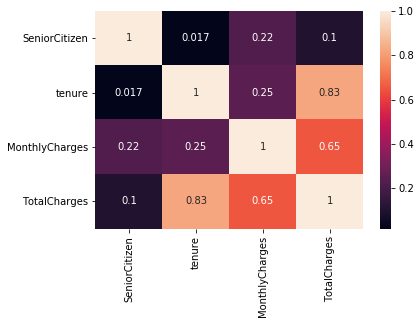

In [10]:
sns.heatmap(df.corr('pearson'), annot =True)

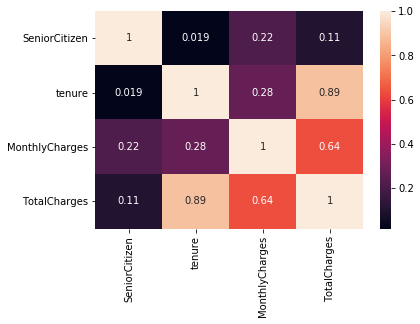

In [11]:
sns.heatmap(df.corr('spearman'), annot =True)

In [12]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta


In [13]:
categorical_col = df.select_dtypes('object').columns[1:17]
for i in categorical_col:
    print(('Correlation Ratio {}: {}'.format(i,
        correlation_ratio( df[i], df['TotalCharges']))))

Correlation Ratio gender: nan
Correlation Ratio Partner: nan
Correlation Ratio Dependents: nan
Correlation Ratio PhoneService: nan
Correlation Ratio MultipleLines: nan
Correlation Ratio InternetService: nan
Correlation Ratio OnlineSecurity: nan
Correlation Ratio OnlineBackup: nan
Correlation Ratio DeviceProtection: nan
Correlation Ratio TechSupport: nan
Correlation Ratio StreamingTV: nan
Correlation Ratio StreamingMovies: nan
Correlation Ratio Contract: nan
Correlation Ratio PaperlessBilling: nan
Correlation Ratio PaymentMethod: nan
Correlation Ratio Churn: nan


Try to replace this string value with 0 and convert the Total Charges to the float data type now

In [14]:
for i in [index_str]:
    df['TotalCharges'][i] = float(0)
df.iloc[index_str]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


I find it interesting that some people still pay their bill via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [16]:
df[df['PaymentMethod']=='Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

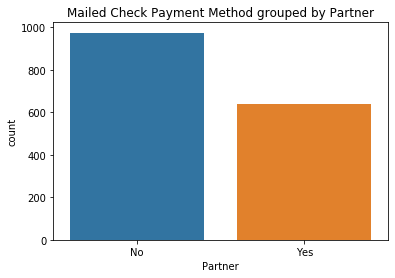

In [17]:
sns.countplot(x = df[df['PaymentMethod']== 'Mailed check']['Partner'],data = df)
plt.title('Mailed Check Payment Method grouped by Partner')
plt.show()

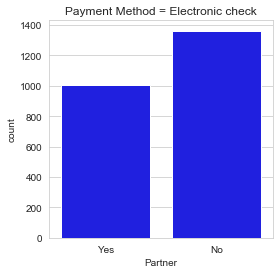

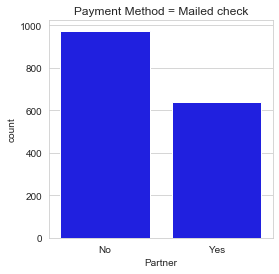

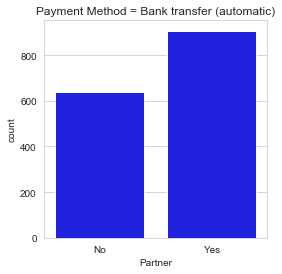

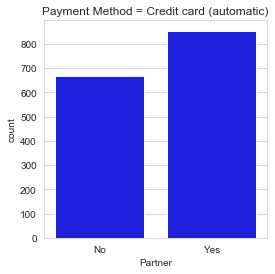

In [18]:
for i in df['PaymentMethod'].unique():
    sns.set_style('whitegrid')
    plt.figure(figsize = (4,4))
    sns.countplot(x = df[df['PaymentMethod']== i]['Partner'],data = df, color='b')
    plt.title('Payment Method = {}'.format (i))
    plt.show()

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

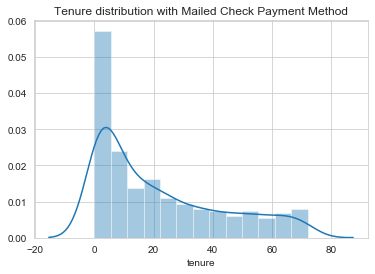

In [19]:
sns.set_style('whitegrid')
sns.distplot(df[df['PaymentMethod']== 'Mailed check']['tenure'], bins=13)
plt.title('Tenure distribution with Mailed Check Payment Method')
plt.show()

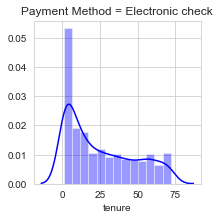

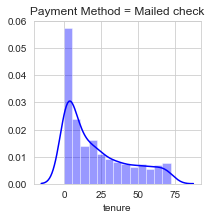

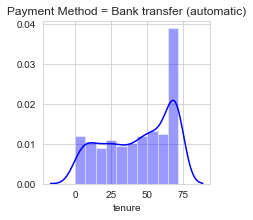

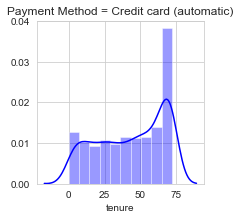

In [20]:
for i in df['PaymentMethod'].unique():
    sns.set_style('whitegrid')
    plt.figure(figsize = (3,3))
    sns.distplot(df[df['PaymentMethod']== i]['tenure'], color='b')
    plt.title('Payment Method = {}'.format (i))
    plt.show()

## Question 2

From the plot above, what could you conclude about people who paid via mailed check? Also. is there any relationship between the tenure and partner column with the payment method?

if we look at the data graph above, we can conclude that people who paid via mailed check and electronic check, mostly people with number of tenure < 25. meanwhile people who paid via bank transfer and credit card mostly with number of tenure > 25. in general we can analyse, that people who has with the company more than > 25 months is feel more safety to use their financial account rather than people that new. 

But we cannot satisfy only by the graph, after we use correlation ratio, actually the relationship between payment method and partner is actually positive and weak. 

In [21]:
categorical_col = df.select_dtypes('object').columns[1:17]
for i in categorical_col:
    print(('Correlation Ratio {}: {}'.format(i,
        correlation_ratio( df[i], df['tenure']))))

Correlation Ratio gender: 0.0051062226199498776
Correlation Ratio Partner: 0.37969746116829295
Correlation Ratio Dependents: 0.1597123312169176
Correlation Ratio PhoneService: 0.008448206732743768
Correlation Ratio MultipleLines: 0.3433817086779951
Correlation Ratio InternetService: 0.03910000916197864
Correlation Ratio OnlineSecurity: 0.3355277949570197
Correlation Ratio OnlineBackup: 0.37568105763082693
Correlation Ratio DeviceProtection: 0.3759815855144694
Correlation Ratio TechSupport: 0.3326254251927329
Correlation Ratio StreamingTV: 0.29234507174842705
Correlation Ratio StreamingMovies: 0.2996012852609076
Correlation Ratio Contract: 0.6758634409341592
Correlation Ratio PaperlessBilling: 0.006152481598271084
Correlation Ratio PaymentMethod: 0.3998293691962001
Correlation Ratio Churn: 0.35222867011307796


That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

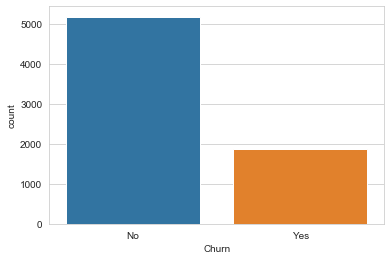

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = df['Churn'],data = df)

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

*Note: if you use looping for showing all the plot, don't forget to add plt.show() after each iteration*

In [23]:
for i in range(len(df['SeniorCitizen'])):
    if df['SeniorCitizen'][i] == 0:
        df['SeniorCitizen'][i] = 'No'
    elif df['SeniorCitizen'][i] == 1:
        df['SeniorCitizen'][i] = 'Yes'
df['SeniorCitizen'].value_counts()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

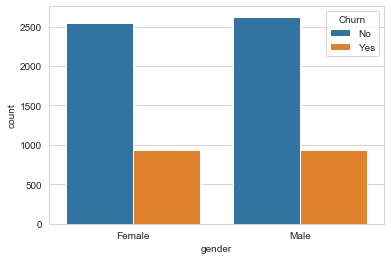

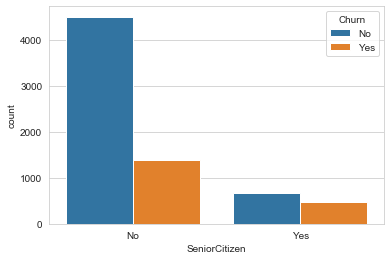

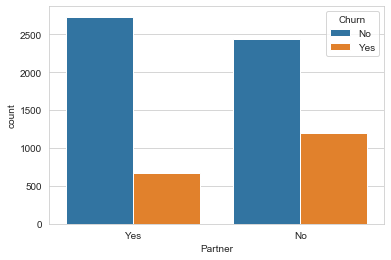

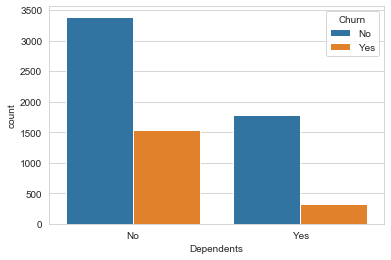

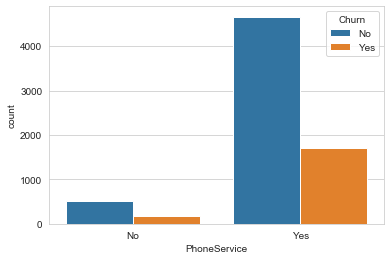

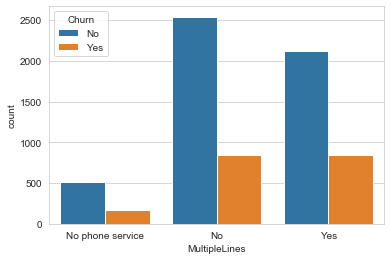

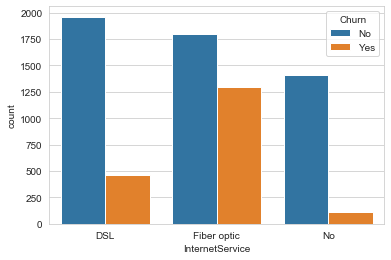

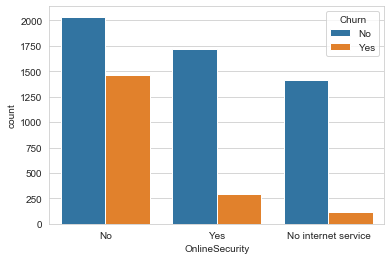

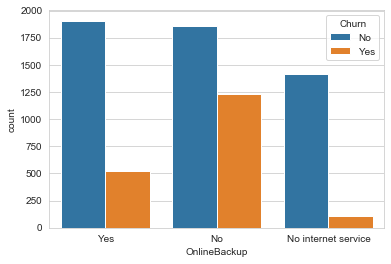

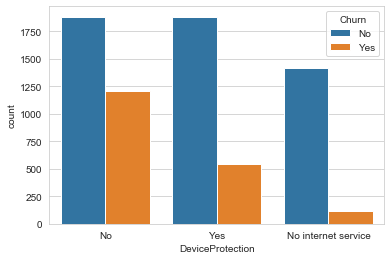

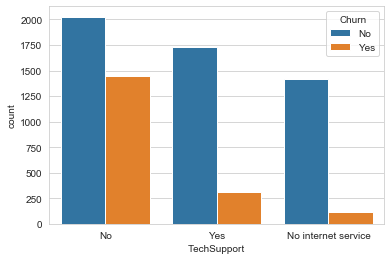

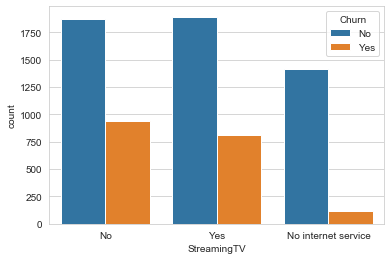

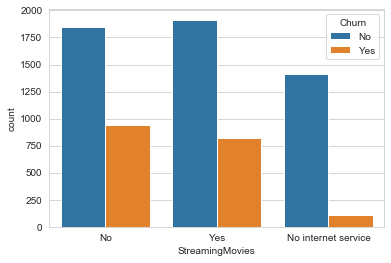

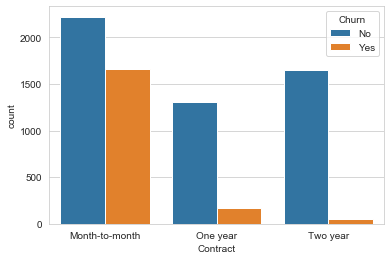

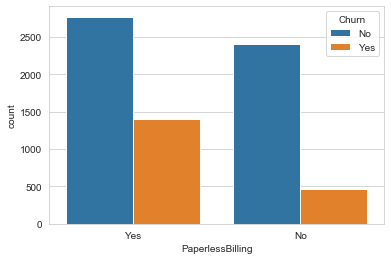

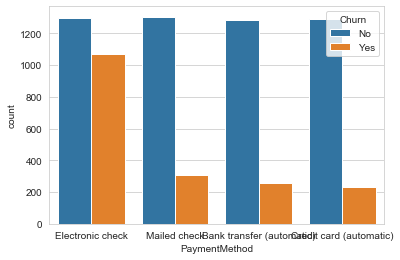

In [24]:
categorical_col= df.select_dtypes('object').columns[1:17]
for i in categorical_col:
    sns.set_style('whitegrid')
    sns.countplot(x = i, data=df, hue=df['Churn'])
    plt.show()

In [25]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

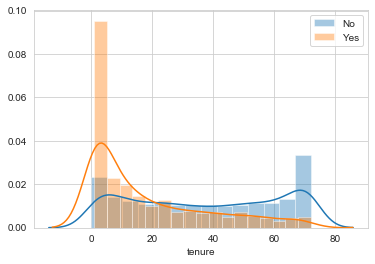

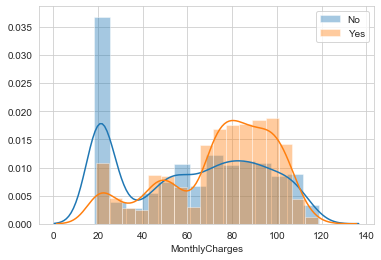

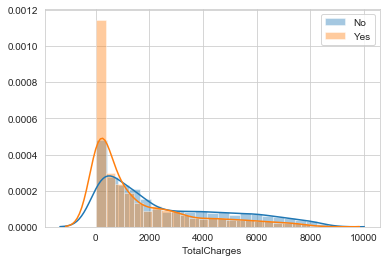

In [26]:
numerical_col= df.select_dtypes('number').columns
for i in numerical_col:
    sns.set_style('whitegrid')
    sns.distplot(df[df['Churn']=='No'][i])
    sns.distplot(df[df['Churn']=='Yes'][i])
    plt.legend(df['Churn'].unique())
    plt.show()

## Question 3

Is there any interesting insight that you could find from the plot above?

# Answer 3

in general, from the plot we can conclude typical customer based on churn category and the relation between numerical feature (teanure, monthly charge and total charge.

- from tenure feature  we can analyse that the more number tenure of customer, the probability they become loyal customer is bigger. And people who didnt satisfy of the product will leave the company earlier at short tenure.

- from monthly charge we can analyse that the more expensive monthly charged to the customer, the graph shows us the bigger number of customer churn. 

- from total charges we can analyse the skenwess distribution is relatively similar between 'No' churn customer and 'yes' churn customer.

The conclusions is despite we charged monthly higher, we could create attractive payment program that can make monthly charged is look cheaper but the customer will delighted and upgrade the product and finally we can charged them at the reasonable price.


As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True.

At the same time, change the Churn feature value with No as 0 and Yes as 1

In [27]:
df_ml1 = df.copy()
data = df.copy()
target = pd.Series(df_ml1['Churn'])
data.drop(['customerID','Churn'], axis=1, inplace=True)
df_dummies = pd.get_dummies(data=data, columns=list(data.select_dtypes('object')), drop_first=True)

In [28]:
for i in range (len(target)):
    if str(target[i])=='No':
        target[i] = 0
    elif str(target[i])=='Yes':
        target[i] = 1

In [29]:
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

# UNSUPERVISED LEARNING

Before we do any of the supervised modelling, let's do some data mining from our data. Remember, as lot of unsupervised model based on distance means that we need to rescale our data to have a same scale. 

In our case, we would use all the data except the target data for data mining. 

First, use the boxplot to check all the data distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

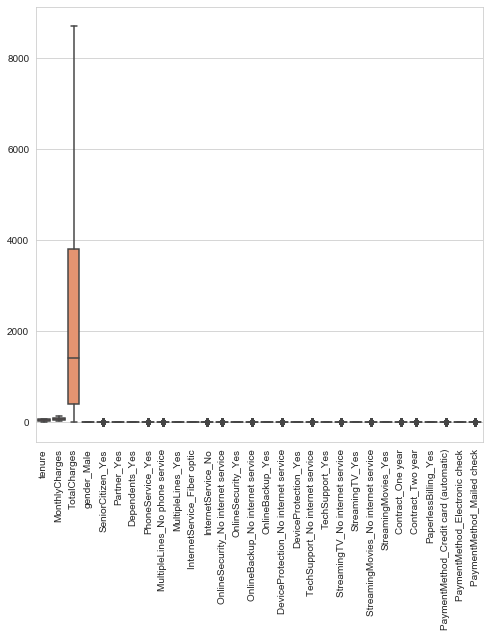

In [31]:
plt.figure(figsize = (8,8))
sns.boxplot(data=df_dummies, orient='v')
plt.xticks(rotation=90)

Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(df_dummies)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_data = pd.DataFrame(scaler.transform(df_dummies), columns = df_dummies.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

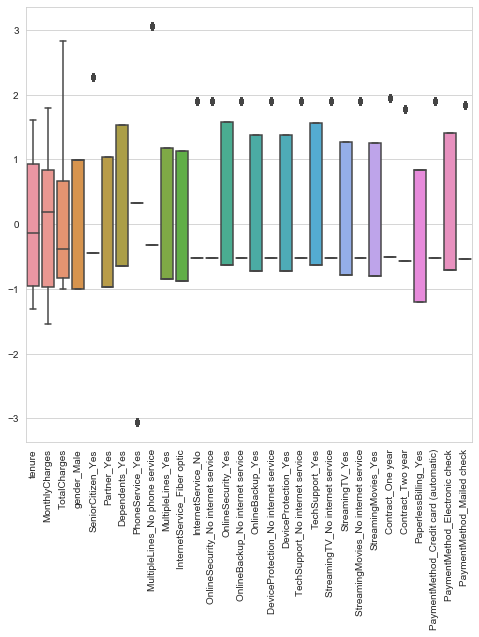

In [35]:
plt.figure(figsize = (8,8))
sns.boxplot(data=scaled_data, orient='v')
plt.xticks(rotation=90)

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=101)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
x_pca = pca.transform(scaled_data)
dfpca = pd.DataFrame(x_pca, columns = ['PC{}'.format(i) for i in range(1,3)])
dfpca['Churn'] = target
dfpca.head()

,PC1,PC2,Churn
0,-0.432402,-3.150994,0
1,-0.204024,-0.794405,0
2,-0.160382,-2.089736,1
3,-0.898671,-0.878803,0
4,-0.613839,-3.175062,1


Our 2 PC only explained around 45 variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

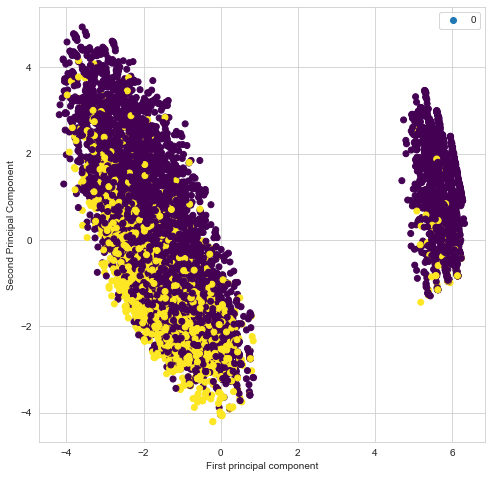

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(dfpca['PC1'],dfpca['PC2'], c=dfpca['Churn'], cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(dfpca['Churn'].unique())

Seems our 2 PC resulting in the 2 different group, it is really interesting as it is not usable for separating our Churn feature but it might end up with another fascinating observation. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 2, DBSCAN model with eps = 0.4 and min_samples = 2, and HDBSCAN model with min_cluster_size =2 and min_samples = 25

Then create the scatter plot to compare the separation performance of each model. 

In [39]:
                        
# Original

# Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(dfpca[['PC1', 'PC2']])
kmeans.predict(dfpca[['PC1', 'PC2']])
dfKmeans = dfpca.copy()
dfKmeans['Category'] = kmeans.labels_

# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.40, min_samples = 2).fit(dfpca[['PC1', 'PC2']])
dfDBSCAN = dfpca.copy()
dfDBSCAN['Category'] = dbscan.labels_

# HDBSCAN
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=2, min_samples=25)
hdbscan.fit(dfpca[['PC1', 'PC2']])
dfHDBSCAN = dfpca.copy()
dfHDBSCAN['Category'] = hdbscan.labels_


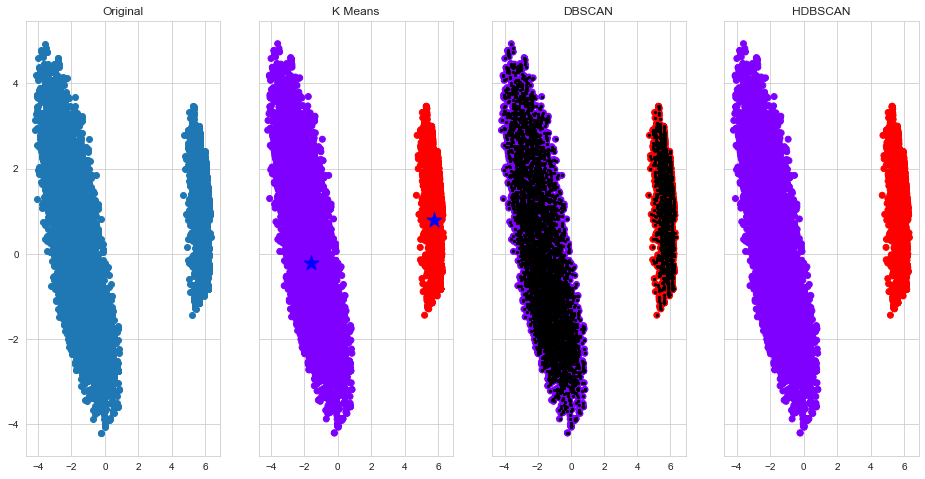

In [40]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,8))
centroids = kmeans.cluster_centers_

ax1.set_title('Original')
ax1.scatter(dfpca['PC1'],dfpca['PC2'])


ax2.set_title('K Means')
ax2.scatter(dfKmeans['PC1'], dfKmeans['PC2'], c=dfKmeans['Category'] ,cmap='rainbow')
ax2.scatter(centroids[:,0], centroids[:,1], marker = '*', c='b', s=250)

core= dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(dfDBSCAN['PC1'], dfDBSCAN['PC2'], c= dfDBSCAN['Category'], cmap = 'rainbow')
ax3.scatter(core[:,0], core[:,1], marker='o', c='black', s=5)


ax4.set_title('HDBSCAN')
ax4.scatter(dfHDBSCAN['PC1'], dfHDBSCAN['PC2'], c=dfHDBSCAN['Category'], cmap='rainbow')

Seems all of our our model resulting in 2 different cluster, just like we expected. Now, return the label from the KMeans model back to the original data and use the pair plot to see the relation between the numerical value with the label as the hue (I am personally name it k-label)

In [41]:
df_pairplot = pd.concat((df_dummies['tenure'], df_dummies['MonthlyCharges'], df_dummies['TotalCharges']), axis=1)
df_pairplot['Churn'] = target.astype('object')
df_pairplot['MonthlyCharges']= df_pairplot['MonthlyCharges'].astype('int64')
df_pairplot['TotalCharges']= df_pairplot['TotalCharges'].astype('int64')
df_pairplot['k-label'] = pd.to_numeric(dfpca['Churn']).astype('object')

In [42]:
df_pairplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
tenure            7043 non-null int64
MonthlyCharges    7043 non-null int64
TotalCharges      7043 non-null int64
Churn             7043 non-null object
k-label           7043 non-null object
dtypes: int64(3), object(2)
memory usage: 275.2+ KB


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

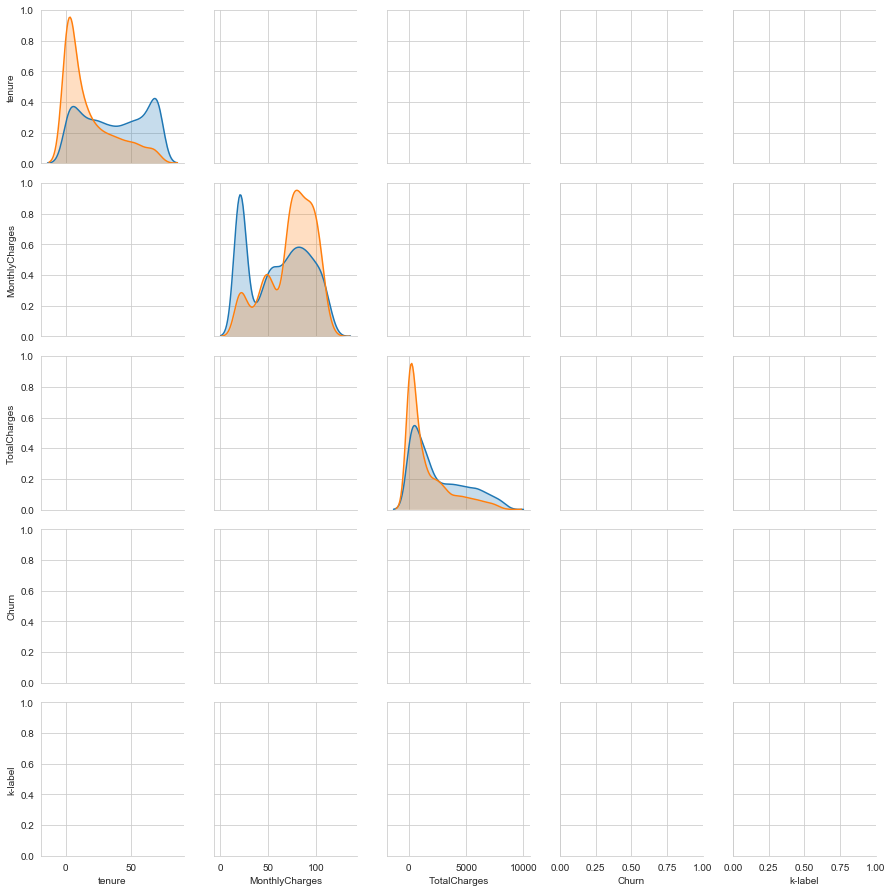

In [43]:
sns.pairplot(df_pairplot, hue='Churn')

## Question 4
Just strictly from the plot above, What kind of insight you could find there?

After the we standardized our numerical feature, and try to show it at paiprloy, we can analyse :
1. distribution between No Churn and Yes Churn based on tenure feature is similar. it means the number of tenure doesnt influence churn rate signicantly (assumptions based on graph, not using statistical method)

2. There is quite different of distribution between No Churn and Yes Churn based on MonthlyCharged Feature. Probability customer will churn at the cheaper monthly charged is bigger than at the higher monthly charged. we can conclude that if the customer is delighted, they will pay higher for the product but if they didnt satisfy they wont use the products anymore. 

3. There is quite different of distribution between No Churn and Yes Churn based on TotalCharged Feature. the conclusion is similar with MonthlyCharged Feature Case.

### Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

In [44]:
df_dummies

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [45]:
target = target.astype('int64')

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size = 0.20, random_state=101)

If you remember, we have a case of data imbalance for our Churn feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [47]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis =1)


The Normal X_train data

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 30 columns):
tenure                                   5634 non-null int64
MonthlyCharges                           5634 non-null float64
TotalCharges                             5634 non-null float64
gender_Male                              5634 non-null uint8
SeniorCitizen_Yes                        5634 non-null uint8
Partner_Yes                              5634 non-null uint8
Dependents_Yes                           5634 non-null uint8
PhoneService_Yes                         5634 non-null uint8
MultipleLines_No phone service           5634 non-null uint8
MultipleLines_Yes                        5634 non-null uint8
InternetService_Fiber optic              5634 non-null uint8
InternetService_No                       5634 non-null uint8
OnlineSecurity_No internet service       5634 non-null uint8
OnlineSecurity_Yes                       5634 non-null uint8
OnlineBackup_No internet service 

The oversampled X_train data

In [49]:
oversampled_trainX = oversampled_trainX.astype('float64')
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 30 columns):
tenure                                   8296 non-null float64
MonthlyCharges                           8296 non-null float64
TotalCharges                             8296 non-null float64
gender_Male                              8296 non-null float64
SeniorCitizen_Yes                        8296 non-null float64
Partner_Yes                              8296 non-null float64
Dependents_Yes                           8296 non-null float64
PhoneService_Yes                         8296 non-null float64
MultipleLines_No phone service           8296 non-null float64
MultipleLines_Yes                        8296 non-null float64
InternetService_Fiber optic              8296 non-null float64
InternetService_No                       8296 non-null float64
OnlineSecurity_No internet service       8296 non-null float64
OnlineSecurity_Yes                       8296 non-null float64
OnlineBacku

## Question 5

This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

# Answer 5

1. For this test, i use 'f1' performance metrics optimization because we can know The model performance from this metrics.  in this case considering the harmonic mean between precision and recall, but it's not involved in the optimization process and they are not required to be differentiable (so despite we can evaluate the model, also we can easily interpret the model itself).

2. 
This test i  did model (Logistic Regression, Random Forest Classification, and XGBoost) by using different data (normal and oversampling data). from the evaluation by using f1, using normal data and oversampling data will give us different performance. if we choose to oversampling by using SMOTE, it will make the model be overfitting. They will raise f1 score for prediction of oversampling train and make no impact in data test. So, the recommendation for the model is not using oversampling method

From random forest model, i already use best paramater search method by using randomizedsearch and gridsearchCV.And the best parameters are : # best parameter {'bootstrap': False, 'min_samples_split': 50, 'n_estimators': 300}

From logistic regression model, i already use best paramater search method by try to change threshold parameter, and the best threshold parameter was 0.50





3. Number 3 will be explained below at the visualization

In [ ]:
4. 

# 1. Logistic Regression 
# 2. Random Forest Classifier
# 3. XGBoost

# 1.a Logistic Regression Normal Data

In [50]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
Predictions_train = logmodel.predict(X_train)
PredictProb_train = logmodel.predict_proba(X_train)

Predictions_test = logmodel.predict(X_test)
PredictProb_test = logmodel.predict_proba(X_test)

In [52]:
predictions_train = []
for pred in PredictProb_train[:,0]:
    if(pred > 0.50):
        predictions_train.append(0)
    else:
        predictions_train.append(1)
        
predictions_test = []
for pred in PredictProb_test[:,0]:
    if(pred > 0.50):
        predictions_test.append(0)
    else:
        predictions_test.append(1)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4148
           1       0.66      0.55      0.60      1486

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [54]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [55]:
con_train= pd.DataFrame(data=confusion_matrix(y_train,predictions_train), columns = ['P No', 'P Yes'], index = ['A No', 'A Yes'])
con_test = pd.DataFrame(data=confusion_matrix(y_test,predictions_test), columns = ['P No', 'P Yes'], index = ['A No', 'A Yes'])
con_train 


,P No,P Yes
A No,3733,415
A Yes,670,816


In [56]:
con_test

,P No,P Yes
A No,934,92
A Yes,189,194


# 1.b Logistic Regression Oversampling Data

In [57]:
logmodel = LogisticRegression()
logmodel.fit(oversampled_trainX,oversampled_trainY)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
Predictions_oversampled_train = logmodel.predict(oversampled_trainX)
PredictProb_oversampled_train = logmodel.predict_proba(oversampled_trainX)

Predictions_test = logmodel.predict(X_test)
PredictProb_test = logmodel.predict_proba(X_test)

In [59]:
predictions_oversampled_train = []
for pred in PredictProb_oversampled_train[:,0]:
    if(pred > 0.50):
        predictions_oversampled_train.append(0)
    else:
        predictions_oversampled_train.append(1)
        
predictions_test = []
for pred in PredictProb_test[:,0]:
    if(pred > 0.50):
        predictions_test.append(0)
    else:
        predictions_test.append(1)

In [60]:
print(classification_report(oversampled_trainY,predictions_oversampled_train))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4148
           1       0.81      0.85      0.83      4148

    accuracy                           0.83      8296
   macro avg       0.83      0.83      0.83      8296
weighted avg       0.83      0.83      0.83      8296



In [61]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1026
           1       0.55      0.63      0.59       383

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409



# 2. a. Random Forest Classifier Normal Data

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, min_samples_split= 50, bootstrap=False)
rfc.fit(X_train, y_train)
# best parameter {'bootstrap': False, 'min_samples_split': 50, 'n_estimators': 300}

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

In [64]:
print(classification_report(y_train,rfc_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4148
           1       0.78      0.59      0.67      1486

    accuracy                           0.85      5634
   macro avg       0.82      0.76      0.79      5634
weighted avg       0.84      0.85      0.84      5634



In [65]:
print(classification_report(y_test,rfc_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.68      0.46      0.55       383

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# 2. b. Random Forest Classifier Oversampling Data

In [66]:
rfc.fit(oversampled_trainX,oversampled_trainY)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rfc_pred_oversampled_train = rfc.predict(oversampled_trainX)
rfc_pred_oversampled_test = rfc.predict(X_test)

In [68]:
print(classification_report(oversampled_trainY,rfc_pred_oversampled_train))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4148
           1       0.87      0.89      0.88      4148

    accuracy                           0.87      8296
   macro avg       0.87      0.87      0.87      8296
weighted avg       0.87      0.87      0.87      8296



In [69]:
print(classification_report(y_test,rfc_pred_oversampled_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1026
           1       0.57      0.61      0.59       383

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409



# 2. c Best Parameters 

### RandomizedSearchCV 

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every splot
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = max_depth = [int(x) for x in np.linspace(10,110, num=11)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
rf_random = RandomizedSearchCV (estimator = rfc,
                                param_distributions = random_grid,
                                n_iter = 10,
                                cv = 5,
                                n_jobs = -1,
                                scoring = 'f1')

In [72]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=50,
                                                    min_weight_fraction_leaf=0.0,
             

In [73]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 163,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

### GridSearch CV (Cross Validation)

In [74]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

In [75]:
search = GridSearchCV(estimator = rfc,
                      refit = 'f1',
                      param_grid = {'n_estimators': [200,300,400,500],
                                    'bootstrap': [True, False],
                                    'min_samples_split': [50,100,150,200]},
                      scoring = 'f1',
                      cv = 5,
                      n_jobs = -1)

In [76]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [77]:
search.best_params_

{'bootstrap': True, 'min_samples_split': 50, 'n_estimators': 500}

# 3. a XGBoost (Normal Data)

In [78]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1)

In [79]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [80]:
print(classification_report(y_train, xgboost.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4148
           1       0.72      0.59      0.65      1486

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.77      5634
weighted avg       0.82      0.83      0.83      5634



In [81]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1026
           1       0.66      0.47      0.55       383

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# 3. b XGBoost (Oversampling Data)

In [82]:
xgboost.fit(oversampled_trainX,oversampled_trainY)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [83]:
print(classification_report(oversampled_trainY, xgboost.predict(oversampled_trainX))) 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4148
           1       0.85      0.89      0.87      4148

    accuracy                           0.87      8296
   macro avg       0.87      0.87      0.87      8296
weighted avg       0.87      0.87      0.87      8296



In [84]:
print(classification_report(y_test, xgboost.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1026
           1       0.57      0.61      0.59       383

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409



# Feature importance

In [101]:
import warnings
warnings.filterwarnings('ignore')
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [105]:
rfc.fit(X_train, y_train)
perm = PermutationImportance(rfc, scoring='roc_auc', random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

ValueError: could not convert string to float: 'Female'

In [103]:
rfc.fit(oversampled_trainX, oversampled_trainY)
perm = PermutationImportance(rfc, scoring='roc_auc', random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names=list(X_test.columns))

Weight,Feature
0.0367 ± 0.0139,Contract_Two year
0.0152 ± 0.0086,Contract_One year
0.0135 ± 0.0071,tenure
0.0113 ± 0.0065,TechSupport_Yes
0.0108 ± 0.0082,OnlineSecurity_Yes
0.0089 ± 0.0040,MonthlyCharges
0.0034 ± 0.0025,OnlineBackup_Yes
0.0025 ± 0.0055,PaymentMethod_Mailed check
0.0021 ± 0.0014,PhoneService_Yes
0.0018 ± 0.0004,MultipleLines_No phone service


# Feature Importances - SHAP (SHapely Additive exPlanations)

In [85]:
import shap

In [86]:
y_test.iloc[3]

1

In [89]:
rfc.fit(X_train, y_train)
rfc.predict_proba(np.array(X_test.iloc[3]).reshape(1,-1))

array([[0.53, 0.47]])

In [90]:
explainer = shap.TreeExplainer(rfc)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [91]:
shap_val = explainer.shap_values(X_test.iloc[3])

In [92]:
explainer.expected_value

array([0.73562833, 0.26437167])

In [93]:
shap_val

[array([-0.09811235,  0.00888964, -0.07743515,  0.00102903, -0.02718205,
        -0.0108684 ,  0.00449521,  0.00252475, -0.00165638,  0.00428738,
         0.04427139, -0.00682807, -0.00316197, -0.00735221, -0.00279233,
         0.02115737, -0.00447888, -0.00415164, -0.00677187, -0.00731913,
        -0.00742265,  0.00612398, -0.01023793,  0.00237226, -0.01521569,
        -0.03685426,  0.02061248, -0.00396463,  0.00943706,  0.0009767 ]),
 array([ 0.09811235, -0.00888964,  0.07743515, -0.00102903,  0.02718205,
         0.0108684 , -0.00449521, -0.00252475,  0.00165638, -0.00428738,
        -0.04427139,  0.00682807,  0.00316197,  0.00735221,  0.00279233,
        -0.02115737,  0.00447888,  0.00415164,  0.00677187,  0.00731913,
         0.00742265, -0.00612398,  0.01023793, -0.00237226,  0.01521569,
         0.03685426, -0.02061248,  0.00396463, -0.00943706, -0.0009767 ])]

In [94]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_val[0], X_test.iloc[3])

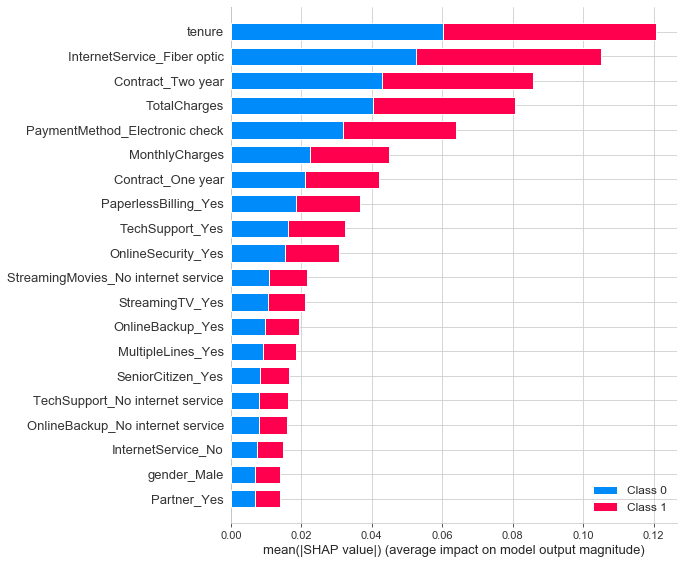

In [98]:
shap_val = explainer.shap_values(X_test)
shap.summary_plot(shap_val, X_test)

3. Dari plot yang divisualisasikan oleh model SHAP bahwa yang memberikan 5 feature terpenting ialah tenure dan seterusnya secara berurutan

# K - Fold

In [95]:
from sklearn.model_selection import KFold
K = 5
kf =KFold(n_splits = K, shuffle = True, random_state = 42)

In [96]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [97]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    logmodel = LogisticRegression()
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

ValueError: could not convert string to float: 'Bank transfer (automatic)'

In [106]:
for i, tr_err, val_err in zip(list(range(1,6,1)), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print((tr_err['report']))
    print(f'Report Validation ke {i} :')
    print((val_err['report']))